In [12]:
import numpy as np
import torch
from torch import nn
from torch.autograd import Variable

In [2]:
from torchvision import datasets, transforms

In [9]:
from tqdm import tqdm

In [4]:
train_dataset = datasets.MNIST(root='./data',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)
test_dataset = datasets.MNIST(root='./data',
                              train=False,
                              transform=transforms.ToTensor())

In [5]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False)

In [7]:
class MNISTSimpleModel(nn.Module):
    def __init__(self, in_dim, n_class):
        super(MNISTSimpleModel, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_dim, 6, 3, stride=1, padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(6, 16, 5, stride=1, padding=0),
            nn.ReLU(True),
            nn.MaxPool2d(2, 2),
        )
        self.fc = nn.Sequential(
            nn.Linear(400, 120),
            nn.Linear(120, 84),
            nn.Linear(84, n_class),
        )
        
    def forward(self, x):
        out = self.conv(x)
        out = out.view(out.size(0), 400)
        out = self.fc(out)
        return out

In [8]:
model = MNISTSimpleModel(1, 10)

In [14]:
# training
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

nb_epochs = 10

for _ in tqdm(range(nb_epochs)):
    for i, data in enumerate(train_loader):
        img, label = data
        img = Variable(img)
        label = Variable(label)
        
        out = model(img)
        loss = criterion(out, label)
        
#         _, pred = torch,max(out, 1)    # predictive result
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

100%|██████████| 10/10 [12:02<00:00, 75.83s/it]


In [15]:
torch.save(model.state_dict(), 'mnist_model.pkl')

In [21]:
model1 = MNISTSimpleModel(1, 10)
model1.load_state_dict(torch.load('mnist_model.pkl'))

<All keys matched successfully>

In [22]:
# testing
nb_test_data = 0
nb_correct = 0

for data in test_loader:
    img, label = data
    out = model1(img)
    _, pred = torch.max(out, 1)
    nb_correct += (pred == label).sum()
    nb_test_data += len(label)
    


In [18]:
print(nb_test_data)

10000

In [19]:
nb_correct

tensor(9782)

In [24]:
import matplotlib.pyplot as plt

In [30]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

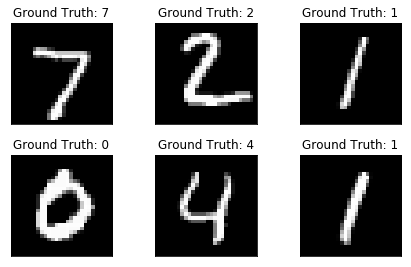

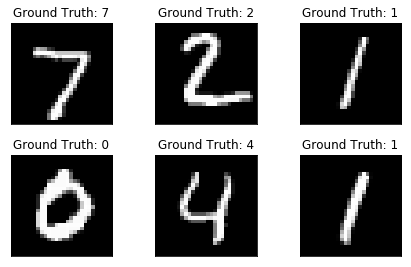

In [31]:
fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])
    
fig